# Importing packages and methods

In [1]:
import time, array, random, copy, math, six, itertools
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from matplotlib.path import Path
from matplotlib import animation, patches
from IPython.display import HTML
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('talk')

In [4]:
markers = ['o', '^', 's', 'D', 'v', 'h', 'p']

In [5]:
pip install git+git://github.com/mkrphys/ipython-tikzmagic.git

  Cloning git://github.com/mkrphys/ipython-tikzmagic.git to /tmp/pip-req-build-kh5l3tar
  Running command git clone --filter=blob:none --quiet git://github.com/mkrphys/ipython-tikzmagic.git /tmp/pip-req-build-kh5l3tar
  fatal: unable to connect to github.com:
  github.com[0: 140.82.121.3]: errno=Connection timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/mkrphys/ipython-tikzmagic.git /tmp/pip-req-build-kh5l3tar did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet git://github.com/mkrphys/ipython-tikzmagic.git /tmp/pip-req-build-kh5l3tar did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


### Relies on DEAP



In [6]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [7]:
from deap import algorithms, base, benchmarks, tools, creator

# Non-dominated Sorting Genetic Algorithm (NSGA-II)

# Implementing NSGA-II


## Search and objective spaces, reproduction operators

In [8]:
toolbox = base.Toolbox()

In [9]:
#creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0,-1.0))
creator.create("FitnessMax3objs", base.Fitness, weights=(+1.0,+1.0,+1.0))

Define problem domain as $\vec{x}\in\left[0,1\right]^{30}$ and a two/three-objective DTLZ3 instance.

In [10]:
creator.create("IndividualUntil3objs", array.array, typecode='d', fitness=creator.FitnessMax3objs)

In [11]:
toolbox.register("evaluate", lambda ind: benchmarks.dtlz3(ind, 3))

In [12]:
BOUND_LOW, BOUND_UP = 0.0, 1.0  # for dtlz3
N_DIM = 30 #5 # equal to the number of objectives + k - 1 for dtlz3, k is related to the number of local optima

#BOUND_LOW, BOUND_UP = -1.5, 1.5 # for dent
#N_DIM = 2 # 2 or more for dent

In [13]:
def uniform(bound_low, bound_up, size=None):
    'Initialization of individuals.'
    return [random.uniform(a, b) for a, b in zip([bound_low] * size, [bound_up] * size)]

In [14]:
toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, N_DIM)

#toolbox.register("individual", tools.initIterate, creator.Individual2Obj, toolbox.attr_float)
toolbox.register("individual", tools.initIterate, creator.IndividualUntil3objs, toolbox.attr_float)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/N_DIM)

toolbox.register("select", tools.selNSGA2)

## Generations and the main parameters

Storing all the required information in the `toolbox` and using DEAP's `algorithms.eaMuPlusLambda` function allows us to create a very compact -albeit not a 100% exact copy of the original- implementation of NSGA-II.

In [15]:
def run_ea(toolbox, stats=None, verbose=False):
    pop = toolbox.population(n=toolbox.pop_size)
    pop = toolbox.select(pop, len(pop))
    return algorithms.eaMuPlusLambda(pop, toolbox, mu=toolbox.pop_size,
                                     lambda_=toolbox.pop_size,
                                     cxpb=1-toolbox.mut_prob,
                                     mutpb=toolbox.mut_prob,
                                     stats=stats,
                                     ngen=toolbox.max_gen,
                                     verbose=verbose)

In [16]:
toolbox.max_gen  = 100 #100-NSAG-II--MEAMT comparison  #400-hypervolume  #100-beautiful surface
toolbox.pop_size = 10 #10 #20 #100
toolbox.mut_prob = 0.2

# Running NSGA-II on DTLZ3

In [17]:
import time, array, random, copy, math, six, itertools
import numpy as np
import pandas as pd

In [18]:
stats = tools.Statistics()
stats.register("pop", copy.deepcopy)

In [19]:
%time res, logbook = run_ea(toolbox, stats=stats)

CPU times: user 338 ms, sys: 3.09 ms, total: 342 ms
Wall time: 403 ms


In [20]:
res[1].fitness

deap.creator.FitnessMax3objs((1705.6965059382233, 67.76060081060321, 5150.362493980492))

In [21]:
res

[IndividualUntil3objs('d', [0.4866833038784477, 0.004495924791568517, 0.15058910645304294, 0.055838204540232174, 0.8537058149102158, 0.7536671827880178, 0.8465888334786916, 0.7578076940649202, 0.2659283883976903, 0.1486240625037338, 0.846772495912413, 0.9759034250546494, 0.9231686217605296, 0.4430265742284362, 0.05532878787456636, 0.06111178212670831, 0.6461394633419948, 0.14069471555606644, 0.9590589706808152, 0.9449319199269243, 0.7476842072121948, 0.046365025212900944, 0.5651936872700898, 0.05266390474187981, 0.44270623425973316, 0.1462305141814268, 0.6642114461366329, 0.8448838591966062, 0.9570891767165925, 0.6604778480922144]),
 IndividualUntil3objs('d', [0.7962520092249834, 0.025277103417157165, 0.15058910645304294, 0.055586388475154014, 0.8537184588000186, 0.7536306294494871, 0.8465888334786916, 0.7589768061725568, 0.2659283883976903, 0.150134726886631, 0.8467720521986689, 0.9758993911285299, 0.9231686264168415, 0.4430265742284362, 0.055320849869281444, 0.06111178212670831, 0.64

# Visualizing results

In [22]:
fronts = tools.emo.sortNondominated(res, len(res))

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


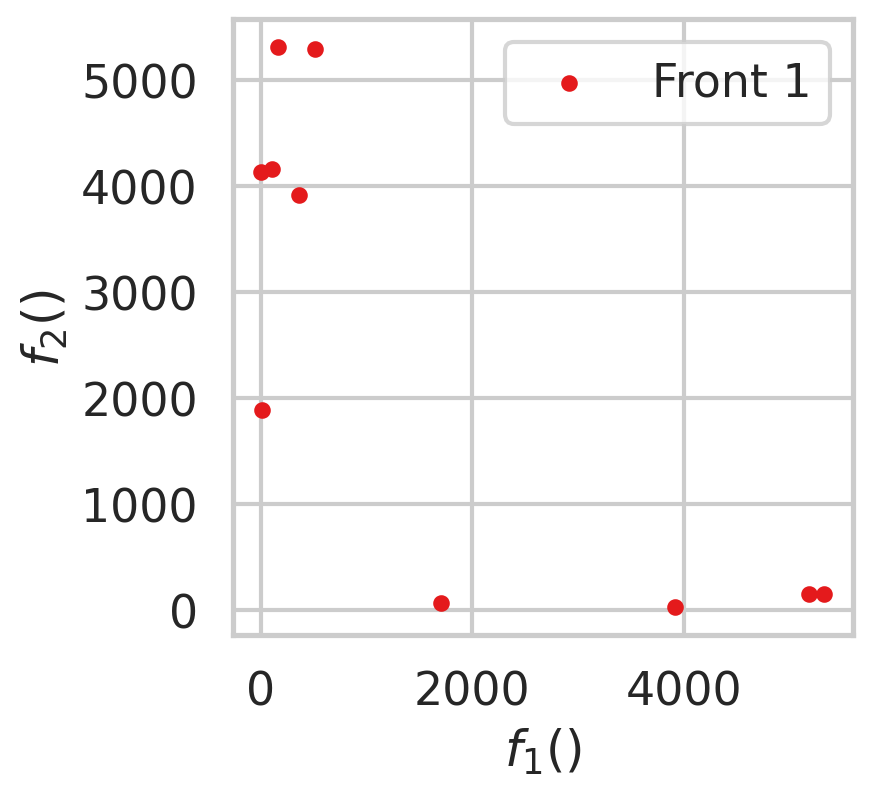

In [23]:
plot_colors = mpl.cm.Set1(np.linspace(0, 1, len(fronts)))
fig, ax = plt.subplots(1, figsize=(4,4))
for i, inds in enumerate(fronts):
    par = [toolbox.evaluate(ind) for ind in inds]
    df = pd.DataFrame(par)
    df.plot(ax=ax, kind='scatter', label='Front ' + str(i+1),
            x=df.columns[0], y=df.columns[1], color=plot_colors[i])
plt.xlabel('$f_1()$');plt.ylabel('$f_2()$'); plt.legend(frameon=True);

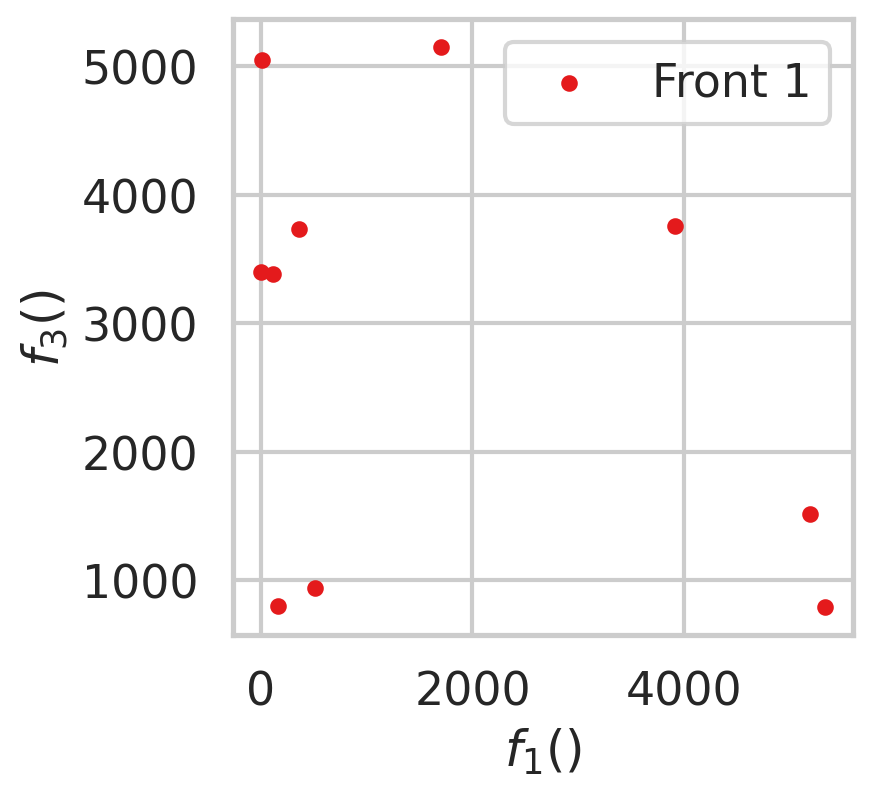

In [24]:
plot_colors = mpl.cm.Set1(np.linspace(0, 1, len(fronts)))
fig, ax = plt.subplots(1, figsize=(4,4))
for i, inds in enumerate(fronts):
    par = [toolbox.evaluate(ind) for ind in inds]
    df = pd.DataFrame(par)
    df.plot(ax=ax, kind='scatter', label='Front ' + str(i+1),
            x=df.columns[0], y=df.columns[2], color=plot_colors[i])
plt.xlabel('$f_1()$');plt.ylabel('$f_3()$'); plt.legend(frameon=True);

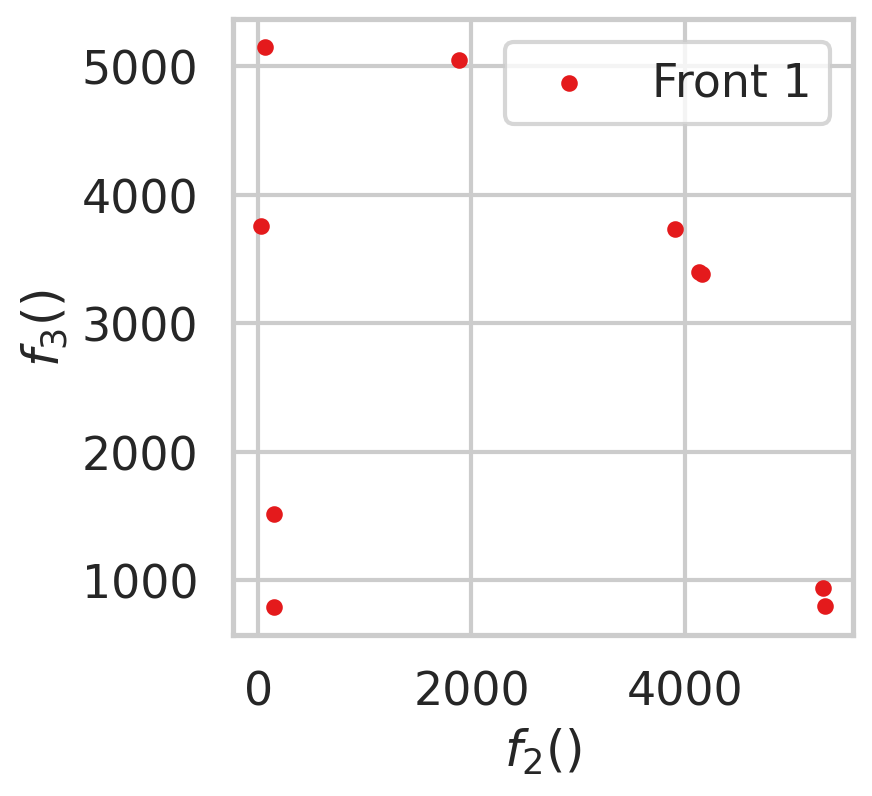

In [25]:
plot_colors = mpl.cm.Set1(np.linspace(0, 1, len(fronts)))
fig, ax = plt.subplots(1, figsize=(4,4))
for i, inds in enumerate(fronts):
    par = [toolbox.evaluate(ind) for ind in inds]
    df = pd.DataFrame(par)
    df.plot(ax=ax, kind='scatter', label='Front ' + str(i+1),
            x=df.columns[1], y=df.columns[2], color=plot_colors[i])
plt.xlabel('$f_2()$');plt.ylabel('$f_3()$'); plt.legend(frameon=True);

In [26]:
evaluations = [ toolbox.evaluate(ind) for ind in res]
#evaluations

In [27]:
df = pd.DataFrame(evaluations, columns = ['f1','f2','f3'])
#df

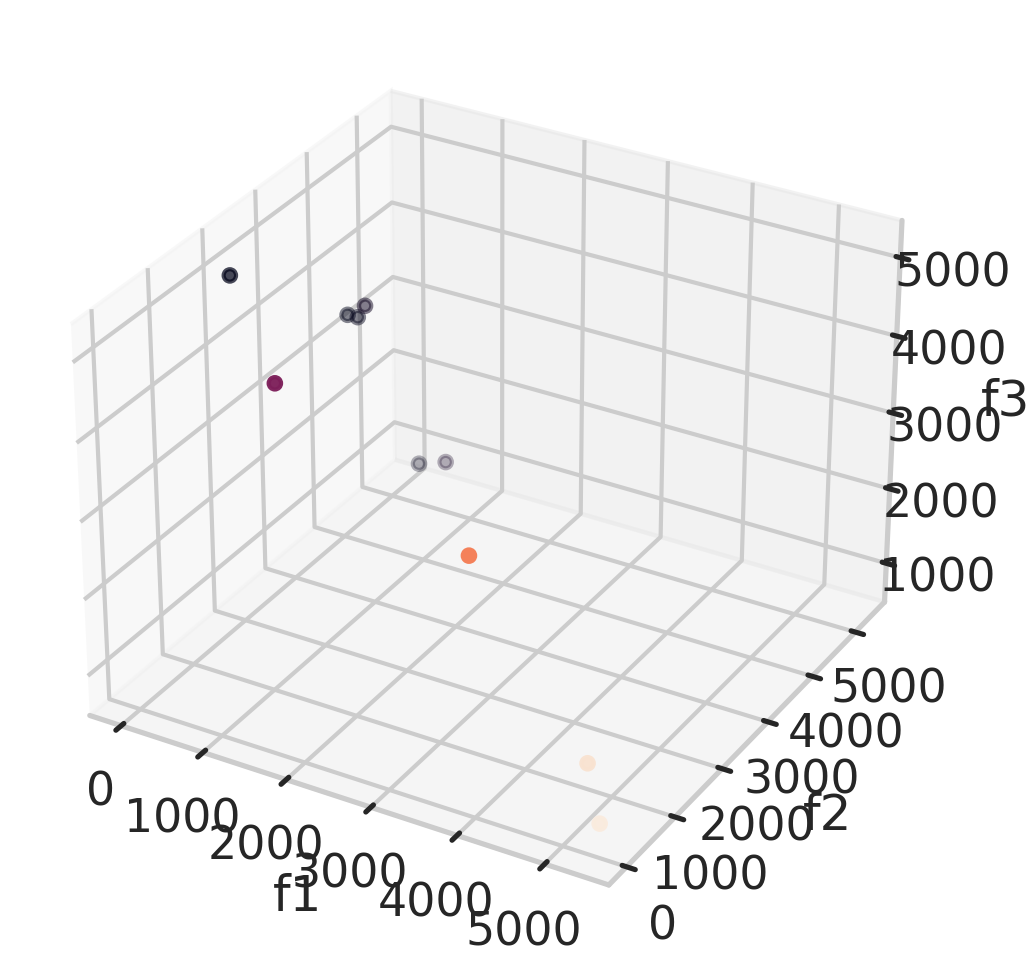

In [28]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

#ax = Axes3D(fig) # Method 1
ax = fig.add_subplot(111, projection='3d') # Method 2

ax.scatter(df['f1'], df['f2'], df['f3'], c=df['f1'], marker='o')
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')

plt.show()

# Hypervolume as the evolution took place

In [29]:
fronts = [tools.sortLogNondominated(pop, k=len(pop), first_front_only=True)
          for pop in logbook.select('pop')]

In [30]:
reference = np.max([np.max([ind.fitness.values for ind in front], axis=0) for front in fronts], axis=0) + 1
print(reference)
#
# for comparison reasons (NSGA-II x MEAMT) we must use the same reference - nadir/utopian point
reference = [6000, 6000, 6000]

[5332.8291993  5312.06502781 5151.36249398]


In [31]:
import deap.benchmarks.tools as bt

In [33]:
hypervols = [bt.hypervolume(front, reference) for front in fronts]

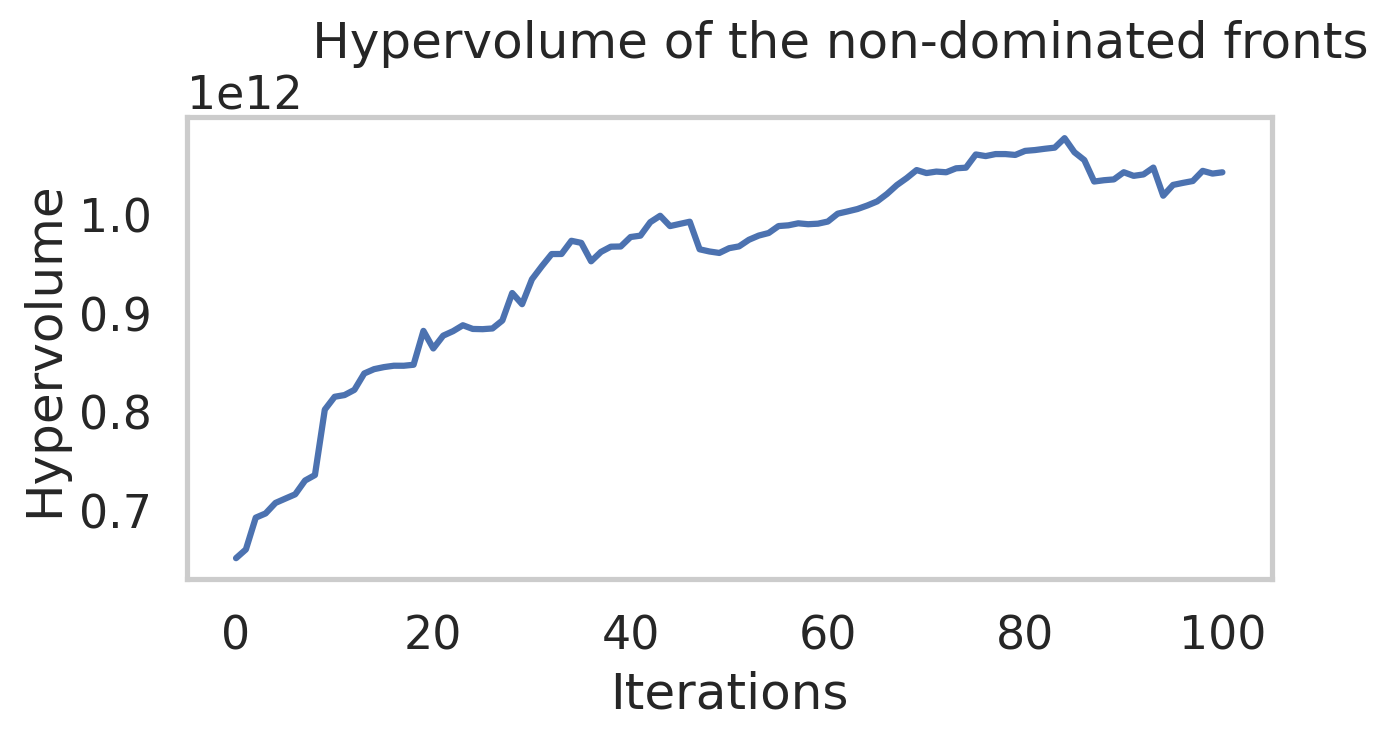

In [34]:
plt.figure(figsize=(7, 3))
plt.plot(hypervols)
plt.title('              Hypervolume of the non-dominated fronts')
plt.xlabel('Iterations')
plt.ylabel('Hypervolume');